In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm_notebook

import os
from sklearn.metrics import log_loss,mean_squared_error,accuracy_score

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
def display_numpy_array(folder_path,image_no):
    files = os.listdir(folder_path)
    file_path = os.path.join(folder_path,files[image_no])
    if file_path[-4:] == '.mat':
#     if image_no == 31:
        return 0,0
    image = Image.open(file_path)
#     image = image.convert('L')
    arr = np.array(image)
    print(arr[100:140,105:120])
    image = Image.fromarray(arr[100:140,105:120])
    plt.imshow(image)
#     newImage = arr[0:260,0:]
#     temp = arr.resize(300,1000)
#     img2 = Image.fromarray(temp,'L')
#     plt.imshow(img2)
#     print(arr.shape)

In [0]:
def displayImage(file_path):
    image = Image.open(file_path)
    image = image.convert('L')
    plt.imshow(image)
    plt.show()

In [0]:
def image_resize(file_path):
    image = Image.open(file_path)
    size = image.size
#     ratio = 0.2  # reduced the size to 90% of the input image
#     reduced_size = int(size[0] * ratio), int(size[1] * ratio)
    reduced_size = 100,50
    im_resized = image.resize(reduced_size, Image.ANTIALIAS)
    return im_resized
#     plt.imshow(im_resized)
#     plt.show()

In [0]:
def read_single_image(folder_path,image_no):
    files = os.listdir(folder_path)
    file_path = os.path.join(folder_path,files[image_no])
    if file_path[-4:] == '.mat':
#     if image_no == 31:
        return
#     print(image_no,' ',file_path)
    displayImage(file_path)
    img = image_resize(file_path)
    plt.imshow(img)
#     display_numpy_array(file_path)

In [0]:
def find_median_size(folder_path,image_no):
    files = os.listdir(folder_path)
    file_path = os.path.join(folder_path,files[image_no])
    if file_path[-4:] == '.mat':
#     if image_no == 31:
        return 0,0
    image = Image.open(file_path)
    size = image.size
    return size[0],size[1]

In [18]:
# read_single_image('put path','index of image')
X = []
Y = []
for i in range(54):
    x,y = find_median_size("./drive/My Drive/Untitled folder/signature/004",i)
    X.append(x)
    Y.append(y)
X = np.array(X)
Y = np.array(Y)
print(int(np.median(X)),int(np.median(Y)))
# for i in range(54):
#     read_single_image("./drive/My Drive/Untitled folder/signature/001",i)

836 552


This clearly shows that I need to bring all the images to the same shape because all images have different shape.

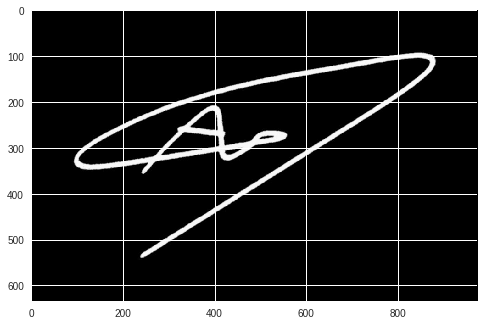

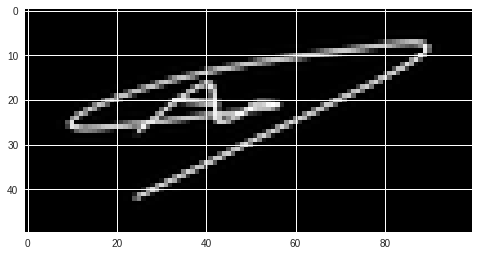

In [20]:
read_single_image("./drive/My Drive/Untitled folder/signature/010",0)
# display_numpy_array("./drive/My Drive/Untitled folder/signature/001",0)

In [0]:
folder_names = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055','056','057','058','059','060','061','062','063','064','065','066','067','068','069','070','071','072','073','074','075','076','077','078','079','080','081','082','083','084','085','086','087','088','089','090','091','092','093','094','095','096','097','098','099','100']
# for i in range(10,100):
#     print(f"'0{i}'",end = ',')

In [0]:
def read_all(folder_path):
#     print("reading")
    images = {}
    files = os.listdir(folder_path)
#     for i, file_name in tqdm_notebook(enumerate(files),total = len(files)):
    for file_name in files:
        file_path = os.path.join(folder_path,file_name)
        if file_path[-4:] == '.mat':
            continue
        image_index = file_name[:-4]
#         image = Image.open(file_path)
        image = image_resize(file_path)
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images
        

In [23]:
images_train = {}
print("reading")
for i, ele in tqdm_notebook(enumerate(folder_names),total = len(folder_names)):
#     print('reading')
    images_train.update(read_all('./drive/My Drive/Untitled folder/signature/'+ele))

reading


In [0]:
# list(images_train.keys())[:5]

In [0]:
X = []
Y = []
for key,value in images_train.items():
    X.append(value)
    if key[:2] == 'cf':
        Y.append(0)
    else:
        Y.append(1)
    
X = np.array(X)
Y = np.array(Y)

In [0]:
# len(images_train)
images_train.clear()

In [26]:
print(X.shape,Y.shape)

(5400, 5000) (5400,)


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 0)

In [0]:
# X.clear()
# Y.clear()

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

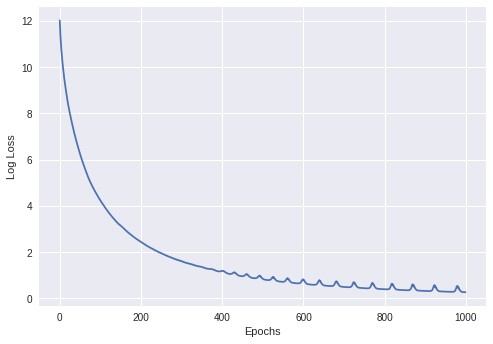

In [38]:
sn_ce = SigmoidNeuron()
sn_ce.fit(X_train, Y_train, epochs=1000, learning_rate=0.0001, loss_fn="ce", display_loss=True)

In [0]:
def display_plot(Y_pred_train,Y_train,length):
    maxi = 1.0e-64
    mini = 2.0
    for i in range(length):
        if Y_train[i] == 0:
            maxi = max(maxi,Y_pred_train[i])
        if Y_train[i] == 1:
            mini = min(mini,Y_pred_train[i])
    print('maxi = ',maxi)
    print('mini = ',mini)
    index = list(i for i in range(length))
    for i in range(length):
        if Y_train[i] == 1:
            temp = 'g'
        else:
            temp = 'r'
        plt.plot(i,Y_pred_train[i],'*',color = temp)

In [0]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)
  display_plot(Y_pred_train,Y_train,len(Y_pred_train))

Train Accuracy :  0.9256944444444445
--------------------------------------------------
maxi =  [0.99999998]
mini =  [7.42599644e-09]


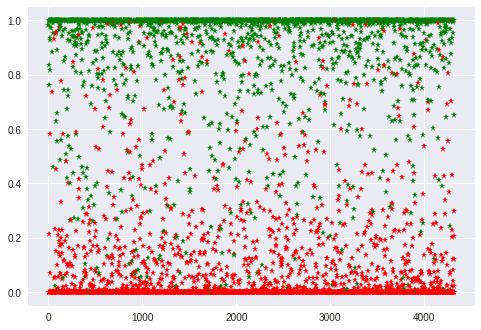

In [45]:
print_accuracy(sn_ce)